In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def find_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def find_mae(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def find_cross_entropy_loss(y_true, y_pred):
    l = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return l

def log_cosh_loss(y_true, y_pred):
    l = np.mean(np.log(np.cosh(y_pred - y_true)))
    return l

def accuracy(y_true, y_pred):
    l = np.mean(y_true == y_pred)
    return l

def find_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    presision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    f1 = (2 * presision * recall) / (recall + presision) if (recall + presision) > 0 else 0

    return f1
    

Коэффициент наклона (w): 1.9957915227919623
Свободный член (b): 0.31164809079670364
MSE на тестовых данных: 0.306630804028323


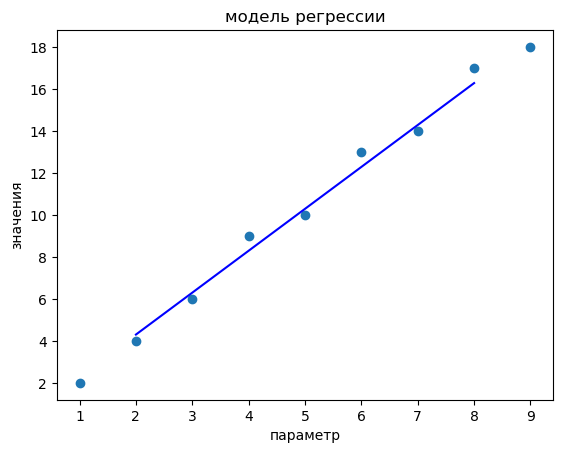

In [17]:
def linear_regression(X, y, learning_rate=0.01, tolerance=1e-6):
  
    n = len(y)
    w = 0  
    b = 0  

    prev_loss = float('inf')
    while True:
        y_pred = w * X + b 
        
        loss = (1/n) * np.sum((y - y_pred) ** 2)
        
        dw = (-2/n) * np.sum((y - y_pred) * X) 
        db = (-2/n) * np.sum(y - y_pred) 
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if abs(prev_loss - loss) < tolerance:
            break
        
        prev_loss = loss
    
    return w, b

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 4, 6, 9, 10, 13, 14, 17, 18])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w, b = linear_regression(X_train, y_train)
print("Коэффициент наклона (w):", w)
print("Свободный член (b):", b)

y_pred = w * X_test + b
test_loss = (1/len(y_test)) * np.sum((y_test - y_pred) ** 2)
print("MSE на тестовых данных:", test_loss)

plt.scatter(X, y)
plt.plot(X_test, y_pred, color='blue', label='y = wx + b')
plt.xlabel("параметр")
plt.ylabel("значения")
plt.title("модель регрессии")
plt.show()

Коэффициент наклона (w): [0.94268393 1.02932522]
Свободный член (b): 0.08664128901881345
MSE на тестовых данных: 0.005911002318533866


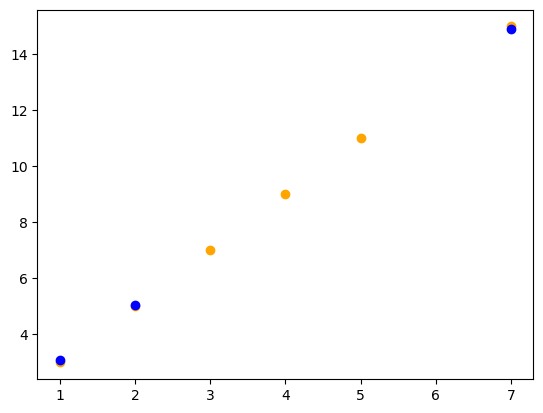

In [24]:
def linear_regression(X, y, learning_rate=0.01, tolerance=1e-6):
  
    n = len(y)
    w = np.zeros(X.shape[1]) 
    b = 0  

    prev_loss = float('inf')
    while True:
        y_pred = X.dot(w) + b 
        
        loss = (1/n) * np.sum((y - y_pred) ** 2)
        
        dw = (-2/n) * X.T.dot(y - y_pred)
        db = (-2/n) * np.sum(y - y_pred) 
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if abs(prev_loss - loss) < tolerance:
            break
        
        prev_loss = loss
    
    return w, b

X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [7, 8]])
y = np.array([3, 5, 7, 9, 11, 15])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

w, b = linear_regression(X_train, y_train)
print("Коэффициент наклона (w):", w)
print("Свободный член (b):", b)

y_pred = X_test.dot(w) + b
test_loss = (1/len(y_test)) * np.sum((y_test - y_pred) ** 2)
print("MSE на тестовых данных:", test_loss)

plt.scatter(X[:, 0], y, color='orange', label='Реальные значения')
plt.scatter(X_test[:, 0], y_pred, color='blue', label='Предсказанные значения')